In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [7]:
from __future__ import division
def eda(dataframe):
    from IPython.core import display as ICD
    
    print "dataframe shape: ",dataframe.shape      ## rows by columns
    print ''
    print 'num duplicates:', dataframe.duplicated().sum() ## df.drop_duplicates() to remove dupes
    print ''
    print "pct missing values \n"
    missing = pd.DataFrame(dataframe.isnull().sum()/len(dataframe)*100,columns=['Pct Missing'])
    missing['Num Missing'] = dataframe.isnull().sum()
    ICD.display(missing), ## count number of null values per column

    print ''
    print "dataframe types \n"
    ICD.display(pd.DataFrame(dataframe.dtypes),columns=['Columns','Dtype'])       ## list data type of each column
    print ''
    print "dataframe describe \n"
    ICD.display(pd.DataFrame(dataframe.describe()))## stats -- mean, min, max, etc.. 
    print ''
    print 'unique values in series:\n'
    u_list = []
    for item in dataframe:                             ## count number of unique values per column
        u_list.append([item, dataframe[item].nunique()])
    unique_vals = pd.DataFrame(u_list,columns=['Column','Num_unique'])
    ICD.display(unique_vals)

In [8]:
eda(train)

dataframe shape:  (891, 12)

num duplicates: 0

pct missing values 



,Pct Missing,Num Missing
PassengerId,0.000000,0
Survived,0.000000,0
Pclass,0.000000,0
Name,0.000000,0
Sex,0.000000,0
Age,19.865320,177
SibSp,0.000000,0
Parch,0.000000,0
Ticket,0.000000,0
Fare,0.000000,0



dataframe types 



,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64



dataframe describe 



,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



unique values in series:



,Column,Num_unique
0,PassengerId,891
1,Survived,2
2,Pclass,3
3,Name,891
4,Sex,2
5,Age,88
6,SibSp,7
7,Parch,7
8,Ticket,681
9,Fare,248


Data Dictionary

### Variable	Definition	Key
- survival	Survival	0 = No, 1 = Yes
- pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
- sex	Sex	
- Age	Age in years	
- sibsp	# of siblings / spouses aboard the Titanic	
- parch	# of parents / children aboard the Titanic	
- ticket	Ticket number	
- fare	Passenger fare	
- cabin	Cabin number	
- embarked	Port of Embarkation

In [14]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [73]:
train[['Sex','Age']].groupby('Sex').describe()

Age                                                    
        count       mean        std   min   25%   50%   75%   max
Sex                                                              
female  261.0  27.915709  14.110146  0.75  18.0  27.0  37.0  63.0
male    453.0  30.726645  14.678201  0.42  21.0  29.0  39.0  80.0

In [136]:
train['AgeRange'] = [
        70 if Age >= 70
    else 60 if Age >= 60
    else 50 if Age >= 50
    else 40 if Age >= 40
    else 30 if Age >= 30
    else 20 if Age >= 20
    else 10 if Age >= 10
    else 0 if Age < 10 
    else np.NaN
    for Age in train.Age
]

In [55]:
train[['Sex','AgeRange']].groupby('Sex').mean()

,AgeRange
Sex,
female,23.409962
male,26.291391


In [165]:
train['Last'] = [Name.split(',')[0] for Name in train.Name]
train['Sal'] = [Name.split(',')[1].strip('the').split()[0] for Name in train.Name]

In [159]:
train[['Sal','Age']].groupby(['Sal']).describe()

Age                                                        
           count       mean        std    min     25%   50%    75%   max
Sal                                                                     
Capt.        1.0  70.000000        NaN  70.00  70.000  70.0  70.00  70.0
Col.         2.0  58.000000   2.828427  56.00  57.000  58.0  59.00  60.0
Don.         1.0  40.000000        NaN  40.00  40.000  40.0  40.00  40.0
Dr.          6.0  42.000000  12.016655  23.00  35.000  46.5  49.75  54.0
Jonkheer.    1.0  38.000000        NaN  38.00  38.000  38.0  38.00  38.0
Lady.        1.0  48.000000        NaN  48.00  48.000  48.0  48.00  48.0
Major.       2.0  48.500000   4.949747  45.00  46.750  48.5  50.25  52.0
Master.     36.0   4.574167   3.619872   0.42   1.000   3.5   8.00  12.0
Miss.      146.0  21.773973  12.990292   0.75  14.125  21.0  30.00  63.0
Mlle.        2.0  24.000000   0.000000  24.00  24.000  24.0  24.00  24.0
Mme.         1.0  24.000000        NaN  24.00  24.000  24.0  24.00  24.0
Mr.        398.0  32.368090  12.708793  11.00  23.000  30.0  39.00  80.0
Mrs.       108.0  35.898148  11.433628  14.00  27.750  35.0  44.00  63.0
Ms.          1.0  28.000000        NaN  28.00  28.000  28.0  28.00  28.0
Rev.         6.0  43.166667  13.136463  27.00  31.500  46.5  53.25  57.0
Sir.         1.0  49.000000        NaN  49.00  49.000  49.0  49.00  49.0
the          1.0  33.000000        NaN  33.00  33.000  33.0  33.00  33.0

Research has informed me that:
Don == Lord = Mr.
Jonkheer = Lady (young) = Miss
Mlle = Ms.
Mme = Mrs.
the is supposed to be Countess == Ms

For sake of standardization, I'm going to make Miss > 12 = Ms, as Master's max age is 12

In [166]:
train['Sal'] = [
        'Mr.' if sal in(['Don.','Junker.','Sir.','Capt.','Col.','Major.']) # added Junker for sake of test set
    else 'Ms.' if sal in(['Jonkheer.','Donna.','Dona.','Mlle.','Lady.','the'])
    else 'Mrs.' if sal=='Mme.'
    else sal
    for sal in train.Sal    
]

In [168]:
for i in range(len(train)):
    if (train.Sal.iloc[i]=='Dr.') & (train.Sex.iloc[i]=='male'):
        train.Sal.iloc[i]='Mr.'
    elif (train.Sal.iloc[i]=='Dr.') & (train.Sex.iloc[i]=='female'):
        train.Sal.iloc[i]='Ms.'

In [169]:
for sal,age in zip(train.Sal,train.Age):
    if (sal=='Miss') & (age>12):
        train.Sal='Ms.'

In [171]:
train[['Sal','Age']].groupby(['Sal']).describe()

Age                                                        
         count       mean        std    min     25%   50%    75%   max
Sal                                                                   
Master.   36.0   4.574167   3.619872   0.42   1.000   3.5   8.00  12.0
Miss.    146.0  21.773973  12.990292   0.75  14.125  21.0  30.00  63.0
Mr.      410.0  32.823171  12.956192  11.00  23.000  30.0  40.00  80.0
Mrs.     109.0  35.788991  11.437490  14.00  27.000  35.0  44.00  63.0
Ms.        7.0  34.857143  10.558229  24.00  26.000  33.0  43.00  49.0
Rev.       6.0  43.166667  13.136463  27.00  31.500  46.5  53.25  57.0

At this point, I haven't added Dr.

In [172]:
train[['Sal','Age']].groupby(['Sal']).describe()

Age                                                        
         count       mean        std    min     25%   50%    75%   max
Sal                                                                   
Master.   36.0   4.574167   3.619872   0.42   1.000   3.5   8.00  12.0
Miss.    146.0  21.773973  12.990292   0.75  14.125  21.0  30.00  63.0
Mr.      410.0  32.823171  12.956192  11.00  23.000  30.0  40.00  80.0
Mrs.     109.0  35.788991  11.437490  14.00  27.000  35.0  44.00  63.0
Ms.        7.0  34.857143  10.558229  24.00  26.000  33.0  43.00  49.0
Rev.       6.0  43.166667  13.136463  27.00  31.500  46.5  53.25  57.0

In [173]:
train[['Sal','Pclass','PassengerId']][train.Age.isnull()].groupby(['Sal','Pclass']).count()

PassengerId
Sal     Pclass             
Master. 3                 4
Miss.   1                 1
        2                 2
        3                33
Mr.     1                21
        2                 9
        3                90
Mrs.    1                 8
        3                 9

In [174]:
train[['Sal','Pclass','Age']][train.Sal.isin(['Dr.','Master.','Miss.','Mr.','Mrs.'])].groupby(['Sal','Pclass']).describe()

Age                                                        
                count       mean        std    min    25%   50%     75%   max
Sal     Pclass                                                               
Master. 1         3.0   5.306667   5.165475   0.92   2.46   4.0   7.500  11.0
        2         9.0   2.258889   2.342634   0.67   0.83   1.0   3.000   8.0
        3        24.0   5.350833   3.593608   0.42   2.00   4.0   9.000  12.0
Miss.   1        45.0  30.000000  12.852308   2.00  21.00  30.0  36.000  63.0
        2        32.0  22.390625  13.374708   2.00  11.75  24.0  30.625  50.0
        3        69.0  16.123188   9.697315   0.75   9.00  18.0  22.000  45.0
Mr.     1        97.0  42.427835  14.011340  17.00  31.00  42.0  51.000  80.0
        2        84.0  32.904762  11.984296  16.00  24.00  31.0  36.625  70.0
        3       229.0  28.724891  10.490946  11.00  21.00  26.0  34.000  74.0
Mrs.    1        35.0  40.400000  12.779119  17.00  35.00  40.0  50.500  62.0
        2        41.0  33.682927  10.318525  14.00  26.00  32.0  41.000  57.0
        3        33.0  33.515152  10.031579  15.00  27.00  31.0  40.000  63.0

In [176]:
data = pd.get_dummies(train,columns=['Sex','Pclass','Embarked','Sal'])

Instead of imputing ages, I'm going to use the Title as an age indicator.

#### Feature Correlation

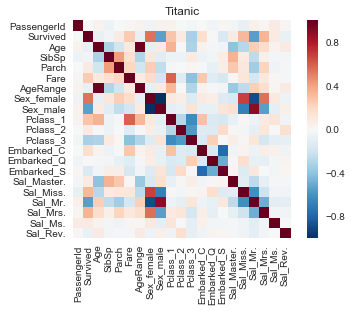

In [177]:
def find_correlation(data,title):
    import seaborn as sns
    import matplotlib.pyplot as plt
    correlation = data.corr()
    sns.heatmap(correlation, vmax=.8, square=True)
    plt.title(title)

find_correlation(data, 'Titanic')

In [273]:
from sklearn.model_selection import train_test_split

X = data[data.columns.drop(['Survived','PassengerId','Name','Ticket','Cabin','Last','Age','AgeRange'])]
y = data.Survived


X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.33, random_state=42)

In [274]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

lr = LogisticRegression().fit(X_train,y_train)

model = SelectFromModel(lr, prefit=True)
X_new = model.transform(X)
X_new.shape

(891, 7)

Get columns that were selected as important

In [256]:
features = list(X_train.columns[model.get_support()])

In [275]:
X_train, X_test, y_train, y_test = train_test_split(
    X_new, y, stratify=y, test_size=0.33, random_state=42)

In [258]:
import numpy as np
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegressionCV

fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=777)

In [293]:

grid = {
        'C': np.power(0.225, np.arange(-10, 10))
         , 'solver': ['newton-cg']
        , 'penalty':['l2']
}


clf = LogisticRegression(random_state=777, max_iter=150000)
gs = GridSearchCV(clf, grid, scoring='accuracy', cv=fold)
gs.fit(X_train, y_train)

print ('gs.best_score_:', gs.best_score_)

('gs.best_score_:', 0.80201342281879195)


In [290]:
params1 = gs.best_params_

In [287]:

grid = {
        'C': np.power(0.3, np.arange(-10, 10))
         , 'solver': ['liblinear']
        , 'penalty':['l1','l2']
}


clf = LogisticRegression(random_state=777, max_iter=150000)
gs = GridSearchCV(clf, grid, scoring='accuracy', cv=fold)
gs.fit(X_train, y_train)

print ('gs.best_score_:', gs.best_score_)

('gs.best_score_:', 0.80201342281879195)


In [288]:
params2 = gs.best_params_

In [280]:

grid = {
        'C': np.power(0.3, np.arange(-10, 10))
#          , 'solver': ['liblinear']
#         , 'penalty':['l1','l2']
}


clf = LogisticRegression(random_state=777, max_iter=150000)
gs = GridSearchCV(clf, grid, scoring='accuracy', cv=fold)
gs.fit(X_train, y_train)

print ('gs.best_score_:', gs.best_score_)

('gs.best_score_:', 0.80201342281879195)


In [281]:
params3 = gs.best_params_

In [282]:

grid = {
        'C': np.power(0.3, np.arange(-10, 10))
#          , 'solver': ['liblinear']
        , 'penalty':['l1','l2']
}


clf = LogisticRegression(random_state=777, max_iter=150000)
gs = GridSearchCV(clf, grid, scoring='accuracy', cv=fold)
gs.fit(X_train, y_train)

print ('gs.best_score_:', gs.best_score_)

('gs.best_score_:', 0.80201342281879195)


In [283]:
params4 = gs.best_params_

In [284]:

grid = {
        'C': np.power(0.3, np.arange(-10, 10))
         , 'solver': ['newton-cg','liblinear']
#         , 'penalty':['l1','l2']
}


clf = LogisticRegression(random_state=777, max_iter=150000)
gs = GridSearchCV(clf, grid, scoring='accuracy', cv=fold)
gs.fit(X_train, y_train)

print ('gs.best_score_:', gs.best_score_)

('gs.best_score_:', 0.80201342281879195)


In [285]:

grid = {
        'C': np.power(0.3, np.arange(-10, 10))
         , 'solver': ['newton-cg','liblinear']
#         , 'penalty':['l1','l2']
}


clf = LogisticRegression(random_state=777, max_iter=150000)
gs = GridSearchCV(clf, grid, scoring='accuracy', cv=fold)
gs.fit(X_train, y_train)

print ('gs.best_score_:', gs.best_score_)

('gs.best_score_:', 0.80201342281879195)


In [286]:
params5 = gs.best_params_

In [291]:
params1, params2, params3, params4, params5

({'C': 0.29999999999999999, 'penalty': 'l2', 'solver': 'newton-cg'},
 {'C': 0.29999999999999999, 'penalty': 'l2', 'solver': 'liblinear'},
 {'C': 0.29999999999999999},
 {'C': 0.29999999999999999, 'penalty': 'l2'},
 {'C': 0.29999999999999999, 'solver': 'newton-cg'})

In [298]:
model = LogisticRegressionCV(penalty='l2',cv=fold, random_state=777, max_iter=150000)
model.fit(X_train, y_train)

LogisticRegressionCV(Cs=10, class_weight=None,
           cv=StratifiedKFold(n_splits=5, random_state=777, shuffle=True),
           dual=False, fit_intercept=True, intercept_scaling=1.0,
           max_iter=150000, multi_class='ovr', n_jobs=1, penalty='l2',
           random_state=777, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0)

In [299]:
model.score(X_test,y_test)

0.79322033898305089

In [301]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier()
clf.fit(X_train, y_train)
clf.score(X_train,y_train)

0.78355704697986572